Model to Predict IRR

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
Path.cwd()

PosixPath('/content')

Import Datasets

In [ ]:
projects = pd.read_csv('Datasets/Synthetic Data/Structured_Projects_Data.csv')
print(projects.shape)
projects.head()

(314, 44)


,Project ID,Impact Bond Name,Stage of Development,Dates - Date outcomes contract signed - (Value),Dates - Date contracts between all parties signed - (Value),Dates - Anticipated completion date - (Value),Dates - Actual completion date - (Value),Dates - Start date of service provision - (Value),Dates - Anticipated end date of service provision - (Value),Dates - Actual end date of service provision - (Value),...,Purpose and classifications - Social challenge - (Value),Purpose and classifications - Policy sector - (Value),Purpose and classifications - Primary SDG goal - (Value),Purpose and classifications - Secondary SDG goals - (Value),Purpose and classifications - Primary SDG target - (Value),Purpose and classifications - Secondary SDG targets - (Value),Service and beneficiaries - Target population - (Value),Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value),Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value),success
0,INDIGO-POJ-0001,Proyecta Tu Futuro [Plan Your Future] - Buenos...,Complete,7/24/2010,7/24/2010,2/6/2013,2/6/2013,7/24/2010,2/6/2013,2/6/2013,...,Homelessness,Education,SDG 4,SDG 3,Target 10.4,Target 1.1,Youth,438,359,1
1,INDIGO-POJ-0002,Aspire Social Impact Bond Adelaide,Implementation,7/29/2024,7/29/2024,7/4/2029,7/4/2029,7/29/2024,7/4/2029,7/4/2029,...,Homelessness,Education,SDG 15,SDG 9,Target 1.2,Target 7.3,Refugees,420,275,1
2,INDIGO-POJ-0003,Benevolent Society Social Benefit Bond (New So...,Planned,7/10/2018,7/10/2018,1/24/2020,1/24/2020,7/10/2018,1/24/2020,1/24/2020,...,Mental health,Criminal justice,SDG 9,SDG 2,Target 8.5,Target 2.4,Youth,500,390,1
3,INDIGO-POJ-0004,Journey to Social Inclusion (Victoria),Implementation,10/20/2025,10/20/2025,3/11/2027,3/11/2027,10/20/2025,3/11/2027,3/11/2027,...,Homelessness,Employment and training,SDG 3,SDG 8,Target 2.4,Target 5.4,Refugees,579,539,1
4,INDIGO-POJ-0005,New South Wales Newpin Social Benefit Bond,Complete,9/28/2025,9/28/2025,7/28/2030,7/28/2030,9/28/2025,7/28/2030,7/28/2030,...,Mental health,Criminal justice,SDG 8,SDG 6,Target 8.4,Target 5.5,Women,532,386,1


In [ ]:
investments = pd.read_csv('Datasets/Synthetic Data/Structured_Outcome_Metrics.csv')
print(investments.shape)
investments.head()

(314, 4)


,Project ID,Total investment commitment,Maximum potential outcome payment,Outcome pricing
0,INDIGO-POJ-0001,249816.05,203880.14,405.89
1,INDIGO-POJ-0002,162407.46,325905.17,752.29
2,INDIGO-POJ-0003,123233.44,77460.18,158.82
3,INDIGO-POJ-0004,108233.80,242217.67,383.76
4,INDIGO-POJ-0005,432977.06,309846.19,585.54


In [ ]:
metrics = pd.read_csv('Structured_Outcome_Metrics.csv')
print(metrics.shape)
metrics.head()

(314, 13)


,Project ID,Outcome Metric ID,Outcome Pricing,Outcome Definition - (Value),Target Population - (Value),Targeted number of service users Or beneficiaries (total) - (Value),Unit type of targeted Service users or beneficiaries - (Value),Outcome metric target - (Value),Policy sector - (Value),Primary SDG goal - (Value),Secondary SDG goals - (Value),Primary SDG target - (Value),Secondary SDG targets - (Value)
0,INDIGO-POJ-0001,metric-0001,405.89,Improved outcomes for individuals in education...,Youth,438,Individual,284,Education,SDG 4,SDG 3,Target 10.4,Target 1.1
1,INDIGO-POJ-0002,metric-0002,752.29,Improved outcomes for individuals in education...,Refugees,420,Individual,273,Education,SDG 15,SDG 9,Target 1.2,Target 7.3
2,INDIGO-POJ-0003,metric-0003,158.82,Improved outcomes for individuals in criminal ...,Youth,500,Individual,300,Criminal justice,SDG 9,SDG 2,Target 8.5,Target 2.4
3,INDIGO-POJ-0004,metric-0004,383.76,Improved outcomes for households in employment...,Refugees,579,Household,347,Employment and training,SDG 3,SDG 8,Target 2.4,Target 5.4
4,INDIGO-POJ-0005,metric-0005,585.54,Improved outcomes for households in criminal j...,Women,532,Household,319,Criminal justice,SDG 8,SDG 6,Target 8.4,Target 5.5


Model Creation

In [ ]:
data = pd.merge(projects, metrics, left_on ="Project ID", right_on="Project ID", how="right")
data = pd.merge(data, investments, left_on=["Project ID"], right_on=["Project ID"], how="right")
print(data.shape)
data.head()

(314, 59)


,Project ID,Impact Bond Name,Stage of Development,Dates - Date outcomes contract signed - (Value),Dates - Date contracts between all parties signed - (Value),Dates - Anticipated completion date - (Value),Dates - Actual completion date - (Value),Dates - Start date of service provision - (Value),Dates - Anticipated end date of service provision - (Value),Dates - Actual end date of service provision - (Value),...,Unit type of targeted Service users or beneficiaries - (Value),Outcome metric target - (Value),Policy sector - (Value),Primary SDG goal - (Value),Secondary SDG goals - (Value),Primary SDG target - (Value),Secondary SDG targets - (Value),Total investment commitment,Maximum potential outcome payment,Outcome pricing
0,INDIGO-POJ-0001,Proyecta Tu Futuro [Plan Your Future] - Buenos...,Complete,7/24/2010,7/24/2010,2/6/2013,2/6/2013,7/24/2010,2/6/2013,2/6/2013,...,Individual,284,Education,SDG 4,SDG 3,Target 10.4,Target 1.1,249816.05,203880.14,405.89
1,INDIGO-POJ-0002,Aspire Social Impact Bond Adelaide,Implementation,7/29/2024,7/29/2024,7/4/2029,7/4/2029,7/29/2024,7/4/2029,7/4/2029,...,Individual,273,Education,SDG 15,SDG 9,Target 1.2,Target 7.3,162407.46,325905.17,752.29
2,INDIGO-POJ-0003,Benevolent Society Social Benefit Bond (New So...,Planned,7/10/2018,7/10/2018,1/24/2020,1/24/2020,7/10/2018,1/24/2020,1/24/2020,...,Individual,300,Criminal justice,SDG 9,SDG 2,Target 8.5,Target 2.4,123233.44,77460.18,158.82
3,INDIGO-POJ-0004,Journey to Social Inclusion (Victoria),Implementation,10/20/2025,10/20/2025,3/11/2027,3/11/2027,10/20/2025,3/11/2027,3/11/2027,...,Household,347,Employment and training,SDG 3,SDG 8,Target 2.4,Target 5.4,108233.80,242217.67,383.76
4,INDIGO-POJ-0005,New South Wales Newpin Social Benefit Bond,Complete,9/28/2025,9/28/2025,7/28/2030,7/28/2030,9/28/2025,7/28/2030,7/28/2030,...,Household,319,Criminal justice,SDG 8,SDG 6,Target 8.4,Target 5.5,432977.06,309846.19,585.54


In [ ]:
data.drop_duplicates(inplace=True)
print(data.shape)
data.columns

(314, 59)


Index(['Project ID', 'Impact Bond Name', 'Stage of Development',
       'Dates - Date outcomes contract signed - (Value)',
       'Dates - Date contracts between all parties signed - (Value)',
       'Dates - Anticipated completion date - (Value)',
       'Dates - Actual completion date - (Value)',
       'Dates - Start date of service provision - (Value)',
       'Dates - Anticipated end date of service provision - (Value)',
       'Dates - Actual end date of service provision - (Value)',
       'Dates - Anticipated duration of service provision - (Value)',
       'Dates - Actual duration of service provision - (Value)',
       'Jurisdiction - Jurisdiction - (Value)',
       'Overall project finance – currency',
       'Overall project finance – minimum', 'Overall project finance – exact',
       'Overall project finance – max',
       'Overall project finance – minimum in USD',
       'Overall project finance – exact in USD',
       'Overall project finance – maximum in USD',
       

In [ ]:
data = data.drop(columns=["Impact Bond Name",
                          "Dates - Date outcomes contract signed - (Value)",
                          "Dates - Start date of service provision - (Value)",
                          'Dates - Anticipated end date of service provision - (Value)',
                          'Dates - Actual end date of service provision - (Value)',
                          'Dates - Actual duration of service provision - (Value)',
                          'Overall project finance – currency',
                          'Overall project finance – minimum',
                          'Overall project finance – exact',
                          'Overall project finance – max',
                          'Overall project finance – minimum in USD',
                          'Overall project finance – exact in USD',
                          'Overall project finance – maximum in USD',
                          'Overall Project Finance – maximum potential loss',
                          'Overall Project Finance – maximum potential return type',
                          'Overall project finance – maximum potential return',
                          'Overall project finance – investor repayment',
                          'Overall project finance - Total outcome payments made - Currency - (Value)',
                          'Overall project finance - Total outcome payments made - Amount - (Value)',
                          'Overall project finance - Total outcome payments made - Amount USD - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Currency - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Amount - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Amount USD - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Date - (Value)',
                          'Investment Details - Internal Rate of Return - Target - (Value)',
                          'Investment Details - Internal Rate of Return - Date - (Value)',
                          'Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value)',
                          'Dates - Date contracts between all parties signed - (Value)',
                          'Dates - Anticipated completion date - (Value)',
                          'Dates - Actual completion date - (Value)',
                          'Project ID','Outcome Metric ID',
                          'Outcome Pricing',
                          'Total investment commitment',
                          'Maximum potential outcome payment',
                          'Stage of Development'
                          ])

print(data.shape)
data.columns

(314, 23)


Index(['Dates - Anticipated duration of service provision - (Value)',
       'Jurisdiction - Jurisdiction - (Value)',
       'Investment Details - Internal Rate of Return - Latest - (Value)',
       'Purpose and classifications - Social challenge - (Value)',
       'Purpose and classifications - Policy sector - (Value)',
       'Purpose and classifications - Primary SDG goal - (Value)',
       'Purpose and classifications - Secondary SDG goals - (Value)',
       'Purpose and classifications - Primary SDG target - (Value)',
       'Purpose and classifications - Secondary SDG targets - (Value)',
       'Service and beneficiaries - Target population - (Value)',
       'Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)',
       'success', 'Outcome Definition - (Value)',
       'Target Population - (Value)',
       'Targeted number of service users Or beneficiaries (total) - (Value)',
       'Unit type of targeted Service users or benefic

In [ ]:
print(data.dtypes)
print(data.shape)

Dates - Anticipated duration of service provision - (Value)                                                 int64
Jurisdiction - Jurisdiction - (Value)                                                                      object
Investment Details - Internal Rate of Return - Latest - (Value)                                           float64
Purpose and classifications - Social challenge - (Value)                                                   object
Purpose and classifications - Policy sector - (Value)                                                      object
Purpose and classifications - Primary SDG goal - (Value)                                                   object
Purpose and classifications - Secondary SDG goals - (Value)                                                object
Purpose and classifications - Primary SDG target - (Value)                                                 object
Purpose and classifications - Secondary SDG targets - (Value)                           

In [ ]:
data = data[data['success'] == 1]

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: ['Jurisdiction - Jurisdiction - (Value)', 'Purpose and classifications - Social challenge - (Value)', 'Purpose and classifications - Policy sector - (Value)', 'Purpose and classifications - Primary SDG goal - (Value)', 'Purpose and classifications - Secondary SDG goals - (Value)', 'Purpose and classifications - Primary SDG target - (Value)', 'Purpose and classifications - Secondary SDG targets - (Value)', 'Service and beneficiaries - Target population - (Value)', 'Outcome Definition - (Value)', 'Target Population - (Value)', 'Unit type of targeted Service users or beneficiaries - (Value)', 'Policy sector - (Value)', 'Primary SDG goal - (Value)', 'Secondary SDG goals - (Value)', 'Primary SDG target - (Value)', 'Secondary SDG targets - (Value)']


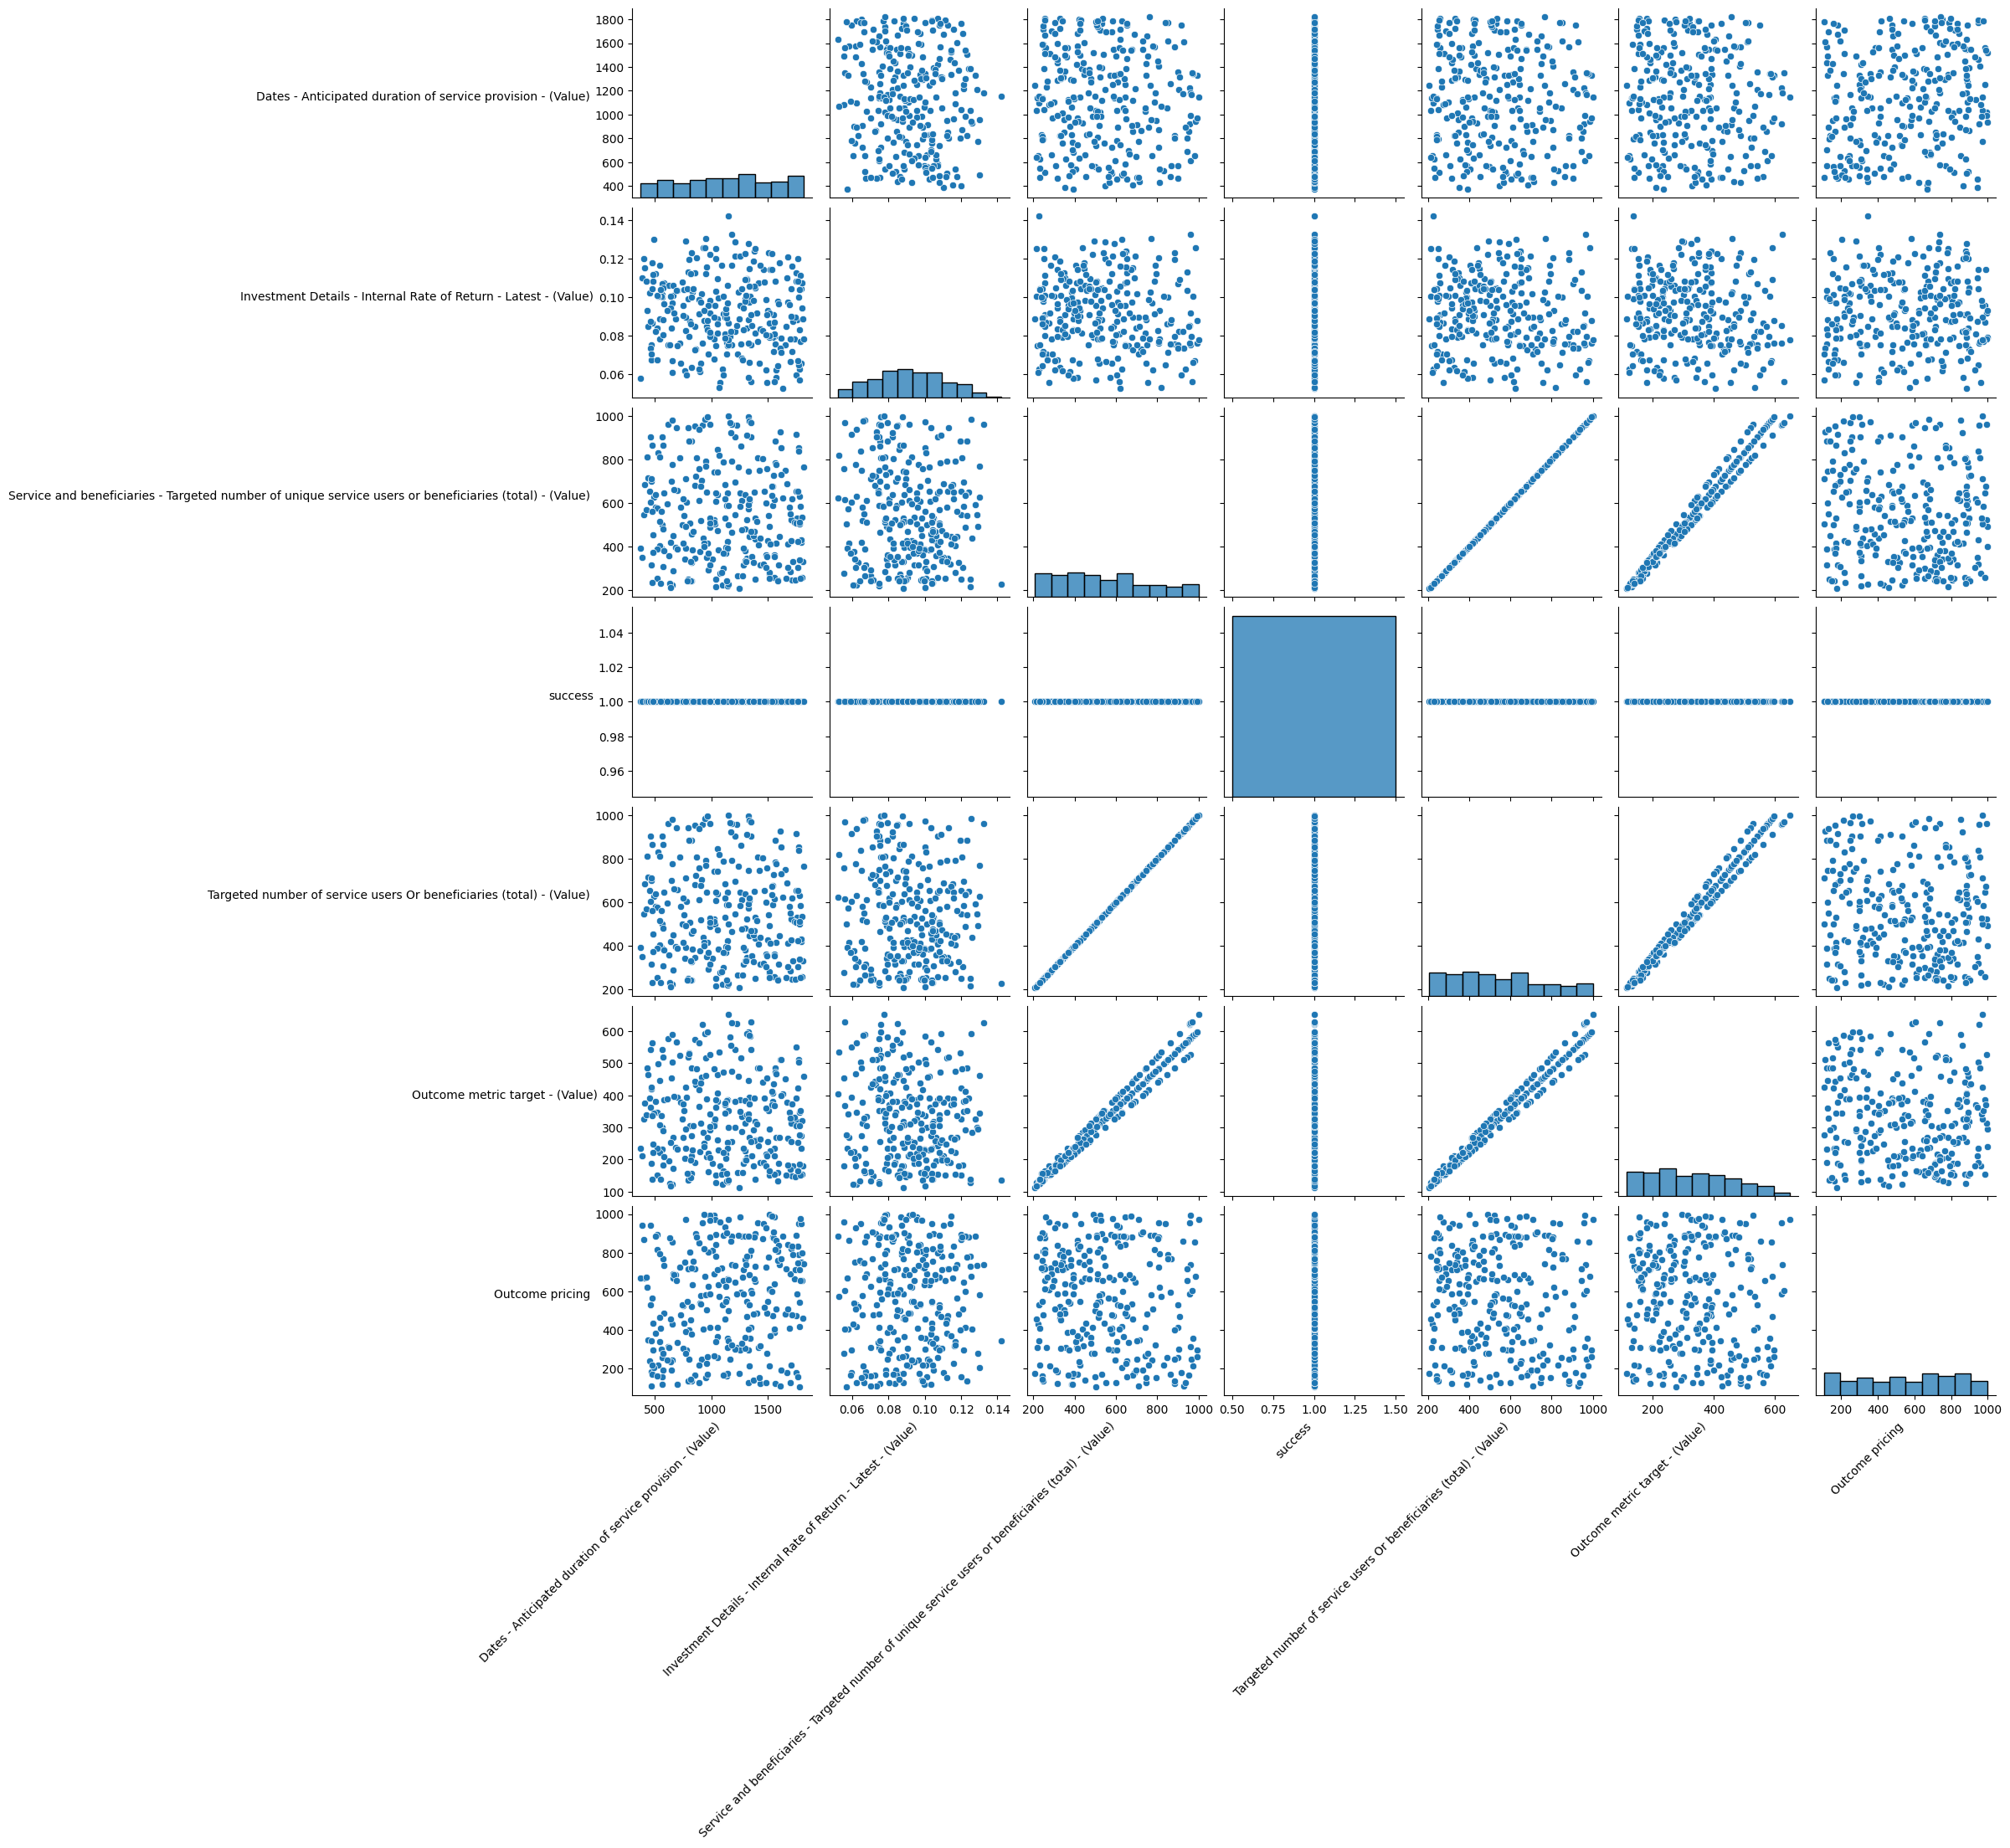

<Figure size 2000x600 with 0 Axes>

In [ ]:
g = sns.pairplot(data)
plt.figure(figsize=(20, 6))

# Rotate x and y axis labels
for ax in g.axes.flatten():
    if ax:  # check if axis is not None
        ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
        ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
average_IRR = data['Investment Details - Internal Rate of Return - Latest - (Value)'].mean()
std_IRR = data['Investment Details - Internal Rate of Return - Latest - (Value)'].std()

print(f"Average IRR: {average_IRR}, Standard Deviation of IRR: {std_IRR}")

Average IRR: 0.09164452554744526, Standard Deviation of IRR: 0.018989609341976566


Regression Analysis

In [ ]:
selected_features = ['Purpose and classifications - Social challenge - (Value)',
                     'Target Population - (Value)',
                     'Service and beneficiaries - Target population - (Value)',
                     'Policy sector - (Value)',
                     'Purpose and classifications - Policy sector - (Value)',
                     'Jurisdiction - Jurisdiction - (Value)',
                     'Outcome Definition - (Value)',
                     'Unit type of targeted Service users or beneficiaries - (Value)',
                     'Outcome metric target - (Value)',
                     'Purpose and classifications - Secondary SDG goals - (Value)',
                     'Dates - Anticipated duration of service provision - (Value)',
                     'Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)',
                     'Targeted number of service users Or beneficiaries (total) - (Value)',
                     ]

X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data['Investment Details - Internal Rate of Return - Latest - (Value)'], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(219, 13)
(55, 13)
(219,)
(55,)


Naive Average Predictor

In [ ]:
y_pred_naive = np.full_like(y_test, fill_value=np.mean(y_train), dtype=np.float64)

mse_naive = mean_squared_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mse_naive)
r2_naive = r2_score(y_test, y_pred_naive)

print(f"Naive Baseline MSE: {mse_naive}")
print(f"Naive Baseline RMSE: {rmse_naive}")
print(f"Naive Baseline R²: {r2_naive}")

Naive Baseline MSE: 0.0003028624626979118
Naive Baseline RMSE: 0.017402944081330373
Naive Baseline R²: -0.038309053086108324


Linear Regression with No Regularization

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Define pipeline
linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
linear.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Outcome metric target - '
                                                   '(Value)',
                                                   'Dates - Anticipated '
                                                   'duration of service '
                                                   'provision - (Value)',
                                                   'Service and beneficiaries '
                                                   '- Targeted number of '
                                                   'unique service users or '
                                                   'beneficiaries (total) - '
                                                   '(Value)',
                                                   'Targeted number of service '
                                                   'users Or beneficiaries '
                                                   '(total) - (Value)']),
                                                 ('cat...
                                                   'Service and beneficiaries '
                                                   '- Target population - '
                                                   '(Value)',
                                                   'Policy sector - (Value)',
                                                   'Purpose and '
                                                   'classifications - Policy '
                                                   'sector - (Value)',
                                                   'Jurisdiction - '
                                                   'Jurisdiction - (Value)',
                                                   'Outcome Definition - '
                                                   '(Value)',
                                                   'Unit type of targeted '
                                                   'Service users or '
                                                   'beneficiaries - (Value)',
                                                   'Purpose and '
                                                   'classifications - '
                                                   'Secondary SDG goals - '
                                                   '(Value)'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

# Training Error
train_mse_linear = mean_squared_error(y_train, y_train_pred)
train_rmse_linear = np.sqrt(train_mse_linear)
train_r2_linear = r2_score(y_train, y_train_pred)

# Testing Error
test_mse_linear = mean_squared_error(y_test, y_test_pred)
test_rmse_linear = np.sqrt(test_mse_linear)
test_r2_linear = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse_linear}, Training RMSE: {train_rmse_linear},  R²: {train_r2_linear}")
print(f"Test MSE: {test_mse_linear}, Test RMSE: {test_rmse_linear}, R²: {test_r2_linear}")

Training MSE: 0.0002825598103999726, Training RMSE: 0.01680951547189783,  R²: 0.2445401453569408
Test MSE: 0.00044264076104772593, Test RMSE: 0.021039029470194814, R²: -0.5175136111839702


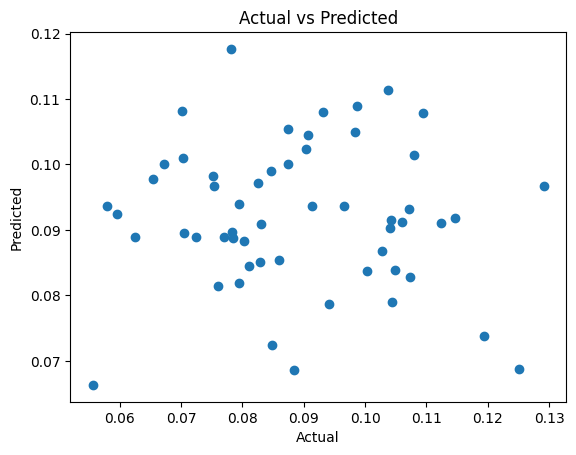

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
# Feature Importance
feature_names = linear.named_steps['preprocessor'].get_feature_names_out()

coef = linear.named_steps['regressor'].coef_

coefficients = pd.Series(coef, index=feature_names).sort_values(key=abs, ascending=False)

print(coefficients)

num__Outcome metric target - (Value)                                                                   -0.013118
cat__Outcome Definition - (Value)_Improved outcomes for households in education sector                  0.011857
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 5                                 -0.011296
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 14                                -0.010250
cat__Outcome Definition - (Value)_Improved outcomes for households in employment and training sector   -0.009513
                                                                                                          ...   
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 17                                 0.000285
cat__Outcome Definition - (Value)_Improved outcomes for familys in housing sector                       0.000270
cat__Policy sector - (Value)_Education                                                          

Lasso Regression - L1 Regularization

In [ ]:
lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

# Grid search over alpha (regularization strength)
param_grid = {
    'regressor__alpha': np.logspace(-4, 1, 50)  # From 0.0001 to 10
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit the model
grid.fit(X_train, y_train)

# Best alpha and model
best_alpha = grid.best_params_['regressor__alpha']
print("Best alpha:", best_alpha)

# Retrieve best pipeline
lasso = grid.best_estimator_

Best alpha: 0.0010481131341546852


In [ ]:
# Predict
y_train_pred_L1 = lasso.predict(X_train)
y_test_pred_L1 = lasso.predict(X_test)

# Training Error
train_mse_L1 = mean_squared_error(y_train, y_train_pred_L1)
train_rmse_L1 = np.sqrt(train_mse_L1)
train_r2_L1 = r2_score(y_train, y_train_pred_L1)

# Testing Error
test_mse_L1 = mean_squared_error(y_test, y_test_pred_L1)
test_rmse_L1 = np.sqrt(test_mse_L1)
test_r2_L1 = r2_score(y_test, y_test_pred_L1)

print(f"Training MSE: {train_mse_L1}, Training RMSE: {train_rmse_L1}, R²: {train_r2_L1}")
print(f"Test MSE: {test_mse_L1}, Test RMSE: {test_rmse_L1}, R²: {test_r2_L1}")

Training MSE: 0.00036452352790894275, Training RMSE: 0.01909249925779605, R²: 0.025399645412234606
Test MSE: 0.00030812135877059127, Test RMSE: 0.017553385963129487, R²: -0.056338224984338714


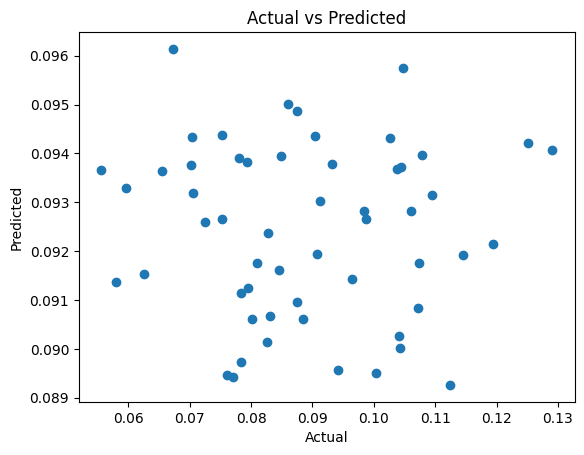

In [ ]:
plt.scatter(y_test, y_test_pred_L1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
# Feature Importance
feature_names = lasso.named_steps['preprocessor'].get_feature_names_out()

coef = lasso.named_steps['regressor'].coef_

coefficients = pd.Series(coef, index=feature_names).sort_values(key=abs, ascending=False)

print(coefficients)

num__Dates - Anticipated duration of service provision - (Value)                                              -0.001695
num__Outcome metric target - (Value)                                                                          -0.001032
num__Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)   -0.000000
num__Targeted number of service users Or beneficiaries (total) - (Value)                                      -0.000000
cat__Purpose and classifications - Social challenge - (Value)_Homelessness                                    -0.000000
                                                                                                                 ...   
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 5                                        -0.000000
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 6                                         0.000000
cat__Purpose and classifications - Secon

Ridge Regression - L2 Regularization

In [ ]:
ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(max_iter=10000))
])

# Grid search over alpha (regularization strength)
param_grid = {
    'regressor__alpha': np.logspace(-4, 1, 50)  # From 0.0001 to 10
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit the model
grid.fit(X_train, y_train)

# Best alpha and model
best_alpha = grid.best_params_['regressor__alpha']
print("Best alpha:", best_alpha)

# Retrieve best pipeline
ridge = grid.best_estimator_

Best alpha: 10.0


In [ ]:
# Predict
y_train_pred_L2 = ridge.predict(X_train)
y_test_pred_L2 = ridge.predict(X_test)

# Training Error
train_mse_L2 = mean_squared_error(y_train, y_train_pred_L2)
train_rmse_L2 = np.sqrt(train_mse_L2)
train_r2_L2 = r2_score(y_train, y_train_pred_L2)

# Testing Error
test_mse_L2 = mean_squared_error(y_test, y_test_pred_L2)
test_rmse_L2 = np.sqrt(test_mse_L2)
test_r2_L2 = r2_score(y_test, y_test_pred_L2)

print(f"Training MSE: {train_mse_L2}, Training RMSE: {train_rmse_L2}, R²: {train_r2_L2}")
print(f"Test MSE: {test_mse_L2}, Test RMSE: {test_rmse_L2}, R²: {test_r2_L2}")

Training MSE: 0.000294733801058167, Training RMSE: 0.01716781293753421, R²: 0.21199142160161655
Test MSE: 0.0003572955840364732, Test RMSE: 0.01890226399234952, R²: -0.2249231424324556


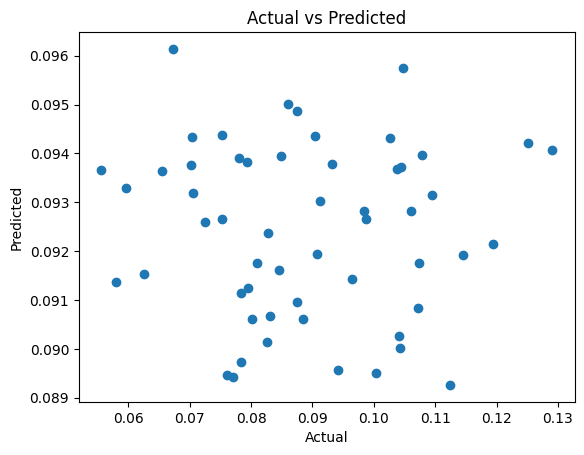

In [ ]:
plt.scatter(y_test, y_test_pred_L1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
# Feature Importance
feature_names = ridge.named_steps['preprocessor'].get_feature_names_out()

coef = ridge.named_steps['regressor'].coef_

coefficients = pd.Series(coef, index=feature_names).sort_values(key=abs, ascending=False)

print(coefficients)

cat__Outcome Definition - (Value)_Improved outcomes for households in education sector                  0.006172
cat__Outcome Definition - (Value)_Improved outcomes for familys in education sector                    -0.005932
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 5                                 -0.005518
cat__Outcome Definition - (Value)_Improved outcomes for households in employment and training sector   -0.005356
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 14                                -0.005179
                                                                                                          ...   
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 17                                 0.000286
cat__Outcome Definition - (Value)_Improved outcomes for familys in housing sector                      -0.000176
cat__Purpose and classifications - Secondary SDG goals - (Value)_SDG 13                         

In [ ]:
# Comparing different regression models

results_regression = [
    {
        "Model": "Linear",
        "Train MSE": train_mse_linear,
        "Train RMSE": train_rmse_linear,
        "Test MSE": test_mse_linear,
        "Test RMSE": test_rmse_linear,
        "Train R²": train_r2_linear,
        "Test R²": test_r2_linear
    },
    {
        "Model": "Lasso",
        "Train MSE": train_mse_L1,
        "Train RMSE": train_rmse_L1,
        "Test MSE": test_mse_L1,
        "Test RMSE": test_rmse_L1,
        "Train R²": train_r2_L1,
        "Test R²": test_r2_L1
    },
    {
        "Model": "Ridge",
        "Train MSE": train_mse_L2,
        "Train RMSE": train_rmse_L2,
        "Test MSE": test_mse_L2,
        "Test RMSE": test_rmse_L2,
        "Train R²": train_r2_L2,
        "Test R²": test_r2_L2
    }
]

results_df = pd.DataFrame(results_regression)
results_df.sort_values(by='Test MSE', ascending=True)

,Model,Train MSE,Train RMSE,Test MSE,Test RMSE,Train R²,Test R²
1,Lasso,0.000365,0.019092,0.000308,0.017553,0.025400,-0.056338
2,Ridge,0.000295,0.017168,0.000357,0.018902,0.211991,-0.224923
0,Linear,0.000283,0.016810,0.000443,0.021039,0.244540,-0.517514


Complex Models

In [ ]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category').cat.codes

In [ ]:
selected_features = ['Dates - Anticipated duration of service provision - (Value)',
                     'Outcome metric target - (Value)',
                     'Outcome Definition - (Value)',
                     'Primary SDG goal - (Value)',
                     'Secondary SDG targets - (Value)',
                     'Purpose and classifications - Secondary SDG targets - (Value)',
                     'Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)',
                     'Purpose and classifications - Primary SDG goal - (Value)',
                     'Target Population - (Value)',
                     'Secondary SDG goals - (Value)',
                     'Jurisdiction - Jurisdiction - (Value)',
                     'Targeted number of service users Or beneficiaries (total) - (Value)',
                     'Service and beneficiaries - Target population - (Value)'
                     ]

X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data['Investment Details - Internal Rate of Return - Latest - (Value)'], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(219, 13)
(55, 13)
(219,)
(55,)


Decision Tree

In [ ]:
param_grid = {
    'max_depth': range(1, 21),
    'min_samples_leaf': range(1, 61)  # Try values 1 through 60
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Because lower MSE is better
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all cores
)

# Fit the model on training data only
grid_search.fit(X_train, y_train)

# Best value found
print("Best depth:", grid_search.best_params_['max_depth'])
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])

Best depth: 1
Best min_samples_leaf: 39


In [ ]:
tree = DecisionTreeRegressor(max_depth= grid_search.best_params_['max_depth'] + 1, min_samples_leaf=grid_search.best_params_['min_samples_leaf'], random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=39, random_state=42)

In [ ]:
y_test_pred_base = tree.predict(X_test)
y_train_pred_base= tree.predict(X_train)

train_mse_base = mean_squared_error(y_train, y_train_pred_base)
train_rmse_base = np.sqrt(train_mse_base)
train_r2_base = r2_score(y_train, y_train_pred_base)
test_mse_base = mean_squared_error(y_test, y_test_pred_base)
test_rmse_base = np.sqrt(test_mse_base)
test_r2_base = r2_score(y_test, y_test_pred_base)

print(f"Train MSE: {train_mse_base}, Train RMSE: {train_rmse_base}, Train R2: {train_r2_base}")
print(f"Test MSE: {test_mse_base}, Test RMSE: {test_rmse_base}, Test R2: {test_r2_base}")

Train MSE: 0.0003501677714089264, Train RMSE: 0.018712770276175742, Train R2: 0.06378159967332298
Test MSE: 0.0003355037406203075, Test RMSE: 0.018316761193516377, Test R2: -0.15021375751601385


[Text(0.6, 0.8333333333333334, 'Dates - Anticipated duration of service provision - (Value) <= 1543.0\nsquared_error = 0.0\nsamples = 219\nvalue = 0.092'),
 Text(0.4, 0.5, 'Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value) <= 707.0\nsquared_error = 0.0\nsamples = 176\nvalue = 0.094'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 130\nvalue = 0.096'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 46\nvalue = 0.089'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 43\nvalue = 0.084'),
 Text(0.7, 0.6666666666666667, '  False')]

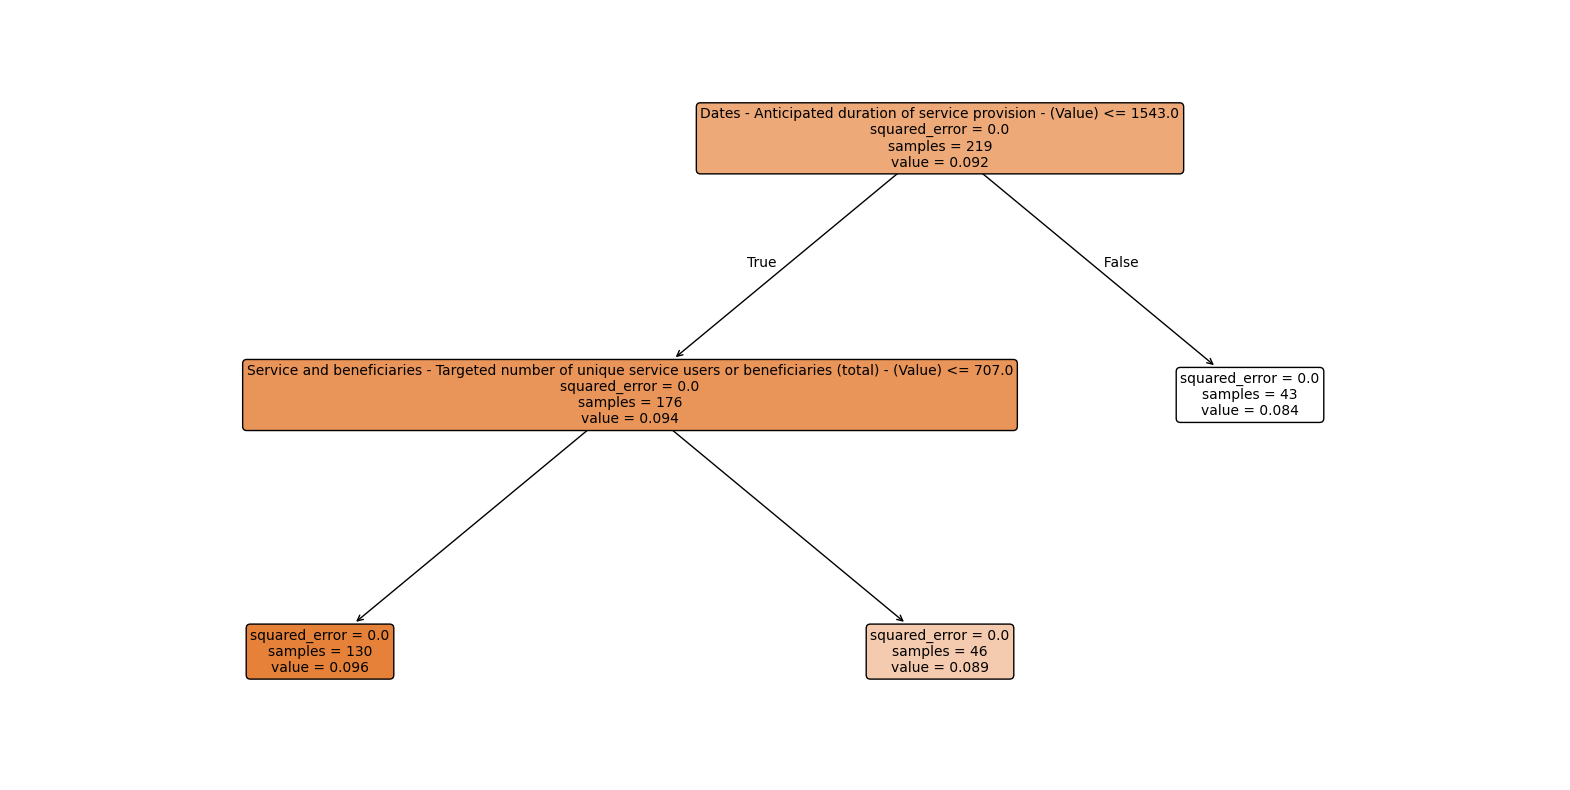

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(
    tree,
    feature_names=X_train.columns,        # Optional: shows feature names
    filled=True,                    # Colors based on prediction
    rounded=True,                   # Rounded box edges
    fontsize=10                     # Adjust text size
)

In [ ]:
importances = tree.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

Dates - Anticipated duration of service provision - (Value)                                               0.676454
Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)    0.323546
Outcome metric target - (Value)                                                                           0.000000
Primary SDG goal - (Value)                                                                                0.000000
Outcome Definition - (Value)                                                                              0.000000
Secondary SDG targets - (Value)                                                                           0.000000
Purpose and classifications - Secondary SDG targets - (Value)                                             0.000000
Purpose and classifications - Primary SDG goal - (Value)                                                  0.000000
Target Population - (Value)                                                     

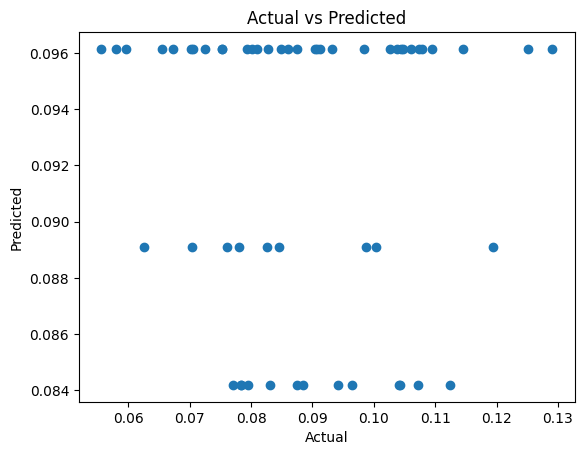

In [ ]:
plt.scatter(y_test, y_test_pred_base)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Decision Tree with Bagging

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200]
}

grid = GridSearchCV(
    BaggingRegressor(estimator=tree, max_samples=0.8, max_features=1.0, bootstrap = True, random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best number of trees:", grid.best_params_['n_estimators'])
print("Best MSE:", -grid.best_score_)

Best number of trees: 50
Best MSE: 0.0003819055624830176


In [ ]:
# Bagging ensemble of trees
bagged_tree = BaggingRegressor(
    estimator=tree,   # The weak learner
    n_estimators=grid.best_params_['n_estimators'],           # Number of trees
    max_samples=0.8,            # % of samples per bootstrap
    max_features=1.0,           # Use all features
    bootstrap=True,             # Enable bootstrapping
    random_state=42
)

# Fit on training data
bagged_tree.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=2,
                                                 min_samples_leaf=39,
                                                 random_state=42),
                 max_samples=0.8, n_estimators=50, random_state=42)

In [ ]:
y_test_pred_bag = bagged_tree.predict(X_test)
y_train_pred_bag= bagged_tree.predict(X_train)

train_mse_bag = mean_squared_error(y_train, y_train_pred_bag)
train_rmse_bag = np.sqrt(train_mse_bag)
train_r2_bag = r2_score(y_train, y_train_pred_bag)
test_mse_bag = mean_squared_error(y_test, y_test_pred_bag)
test_rmse_bag = np.sqrt(test_mse_bag)
test_r2_bag = r2_score(y_test, y_test_pred_bag)

print(f"Train MSE: {train_mse_bag}, Train RMSE: {train_rmse_bag}, Train R2: {train_r2_bag}")
print(f"Test MSE: {test_mse_bag}, Test RMSE: {test_rmse_bag}, Test R2: {test_r2_bag}")

Train MSE: 0.0003578872180338799, Train RMSE: 0.0189179073375963, Train R2: 0.04314267010666861
Test MSE: 0.0002994516766607961, Test RMSE: 0.01730467210497778, Test R2: -0.0266157914354912


In [ ]:
importances = np.mean([
    tree.feature_importances_ for tree in bagged_tree.estimators_
], axis=0)

# Turn into a pandas Series for easy viewing
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

Dates - Anticipated duration of service provision - (Value)                                               0.281887
Outcome metric target - (Value)                                                                           0.149469
Secondary SDG goals - (Value)                                                                             0.117951
Purpose and classifications - Primary SDG goal - (Value)                                                  0.097005
Outcome Definition - (Value)                                                                              0.074744
Secondary SDG targets - (Value)                                                                           0.062797
Primary SDG goal - (Value)                                                                                0.058557
Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)    0.054796
Purpose and classifications - Secondary SDG targets - (Value)                   

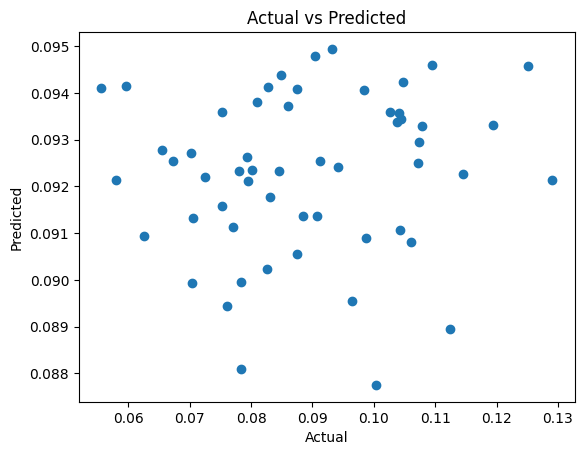

In [ ]:
plt.scatter(y_test, y_test_pred_bag)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best number of trees:", grid_search.best_params_['n_estimators'])

Best number of trees: 50


In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],      # Number of trees in the forest
    max_depth=5,             # Maximum depth of each tree (optional)
    min_samples_leaf=58,       # Minimum samples required at a leaf node (optional)
    bootstrap=True,           # Use bootstrap samples (bagging)
    random_state=42,          # Reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=58, n_estimators=50,
                      random_state=42)

In [ ]:
y_test_pred_rf = rf_model.predict(X_test)
y_train_pred_rf= rf_model.predict(X_train)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Train MSE: {train_mse_rf}, Train RMSE: {train_rmse_rf}, Train R2: {train_r2_rf}")
print(f"Test MSE: {test_mse_rf}, Test RMSE: {test_rmse_rf}, Test R2: {test_r2_rf}")

Train MSE: 0.0003661221979521385, Train RMSE: 0.019134319897820735, Train R2: 0.021125396230281646
Test MSE: 0.00030237753271846374, Test RMSE: 0.01738900608771139, Test R2: -0.03664655855546051


In [ ]:
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

Dates - Anticipated duration of service provision - (Value)                                               0.16
Outcome metric target - (Value)                                                                           0.14
Outcome Definition - (Value)                                                                              0.12
Purpose and classifications - Secondary SDG targets - (Value)                                             0.12
Secondary SDG goals - (Value)                                                                             0.10
Purpose and classifications - Primary SDG goal - (Value)                                                  0.08
Primary SDG goal - (Value)                                                                                0.08
Secondary SDG targets - (Value)                                                                           0.06
Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)    0.04
T

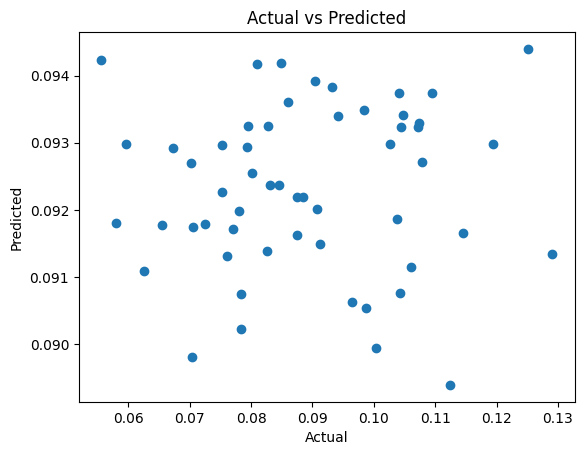

In [ ]:
plt.scatter(y_test, y_test_pred_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
# Comparing different decision tree models

results_tree = [
    {
        "Model": "Decision Tree",
        "Train MSE": train_mse_base,
        "Train RMSE": train_rmse_base,
        "Test MSE": test_mse_base,
        "Test RMSE": test_rmse_base,
        "Train R²": train_r2_base,
        "Test R²": test_r2_base
    },
    {
        "Model": "Bagging",
        "Train MSE": train_mse_bag,
        "Train RMSE": train_rmse_bag,
        "Test MSE": test_mse_bag,
        "Test RMSE": test_rmse_bag,
        "Train R²": train_r2_bag,
        "Test R²": test_r2_bag
    },
    {
        "Model": "Random Forest",
        "Train MSE": train_mse_rf,
        "Train RMSE": train_rmse_rf,
        "Test MSE": test_mse_rf,
        "Test RMSE": test_rmse_rf,
        "Train R²": train_r2_rf,
        "Test R²": test_r2_rf
    }
]

results_df = pd.DataFrame(results_tree)
results_df.sort_values(by='Test MSE', ascending=True)

,Model,Train MSE,Train RMSE,Test MSE,Test RMSE,Train R²,Test R²
1,Bagging,0.000358,0.018918,0.000299,0.017305,0.043143,-0.026616
2,Random Forest,0.000366,0.019134,0.000302,0.017389,0.021125,-0.036647
0,Decision Tree,0.000350,0.018713,0.000336,0.018317,0.063782,-0.150214


XGBoost

In [ ]:
import xgboost as xgb

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [ ]:
# Get the best model
xgb_best = grid_search.best_estimator_

# Make predictions
y_train_pred_xgb = xgb_best.predict(X_train)
y_test_pred_xgb = xgb_best.predict(X_test)

# Calculate metrics
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_rmse_xgb = np.sqrt(train_mse_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(test_mse_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

xgboost_results = {
    "Model": "XGBoost",
    "Train MSE": train_mse_xgb,
    "Train RMSE": train_rmse_xgb,
    "Test MSE": test_mse_xgb,
    "Test RMSE": test_rmse_xgb,
    "Train R²": train_r2_xgb,
    "Test R²": test_r2_xgb
}


print(f"Train MSE: {train_mse_xgb}, Train RMSE: {train_rmse_xgb}, Train R2: {train_r2_xgb}")
print(f"Test MSE: {test_mse_xgb}, Test RMSE: {test_rmse_xgb}, Test R2: {test_r2_xgb}")

Train MSE: 0.00032374566741193796, Train RMSE: 0.0179929338189173, Train R2: 0.13442447990697481
Test MSE: 0.00031357568673523315, Test RMSE: 0.01770806840779742, Test R2: -0.0750373996979683


In [ ]:
# Feature importance
importances = xgb_best.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

Dates - Anticipated duration of service provision - (Value)                                               0.221097
Primary SDG goal - (Value)                                                                                0.204668
Outcome metric target - (Value)                                                                           0.187203
Secondary SDG goals - (Value)                                                                             0.145291
Outcome Definition - (Value)                                                                              0.124310
Secondary SDG targets - (Value)                                                                           0.117431
Purpose and classifications - Secondary SDG targets - (Value)                                             0.000000
Purpose and classifications - Primary SDG goal - (Value)                                                  0.000000
Service and beneficiaries - Targeted number of unique service users or beneficia

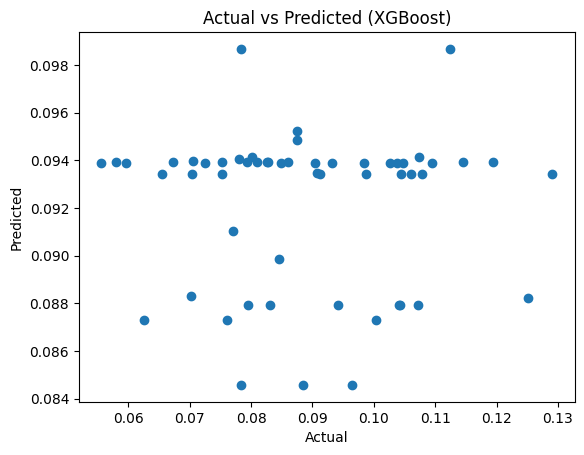

In [ ]:
# Plot actual vs predicted
plt.scatter(y_test, y_test_pred_xgb)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (XGBoost)")
plt.show()



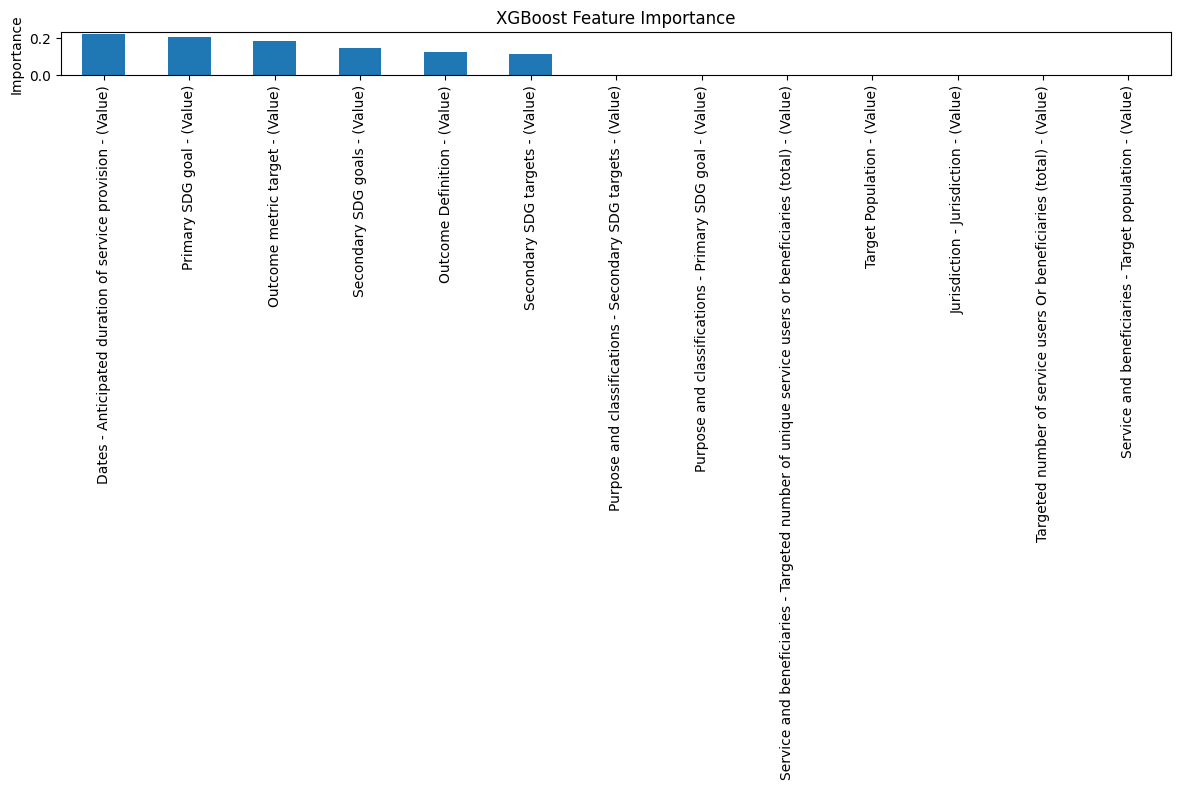

In [ ]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('XGBoost Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Comparing Simple and Complex Models against Baseline

In [ ]:
combined_results = results_regression + results_tree + [xgboost_results]
df_combined = pd.DataFrame(combined_results)
df_combined.sort_values(by='Test MSE', ascending=True)


,Model,Train MSE,Train RMSE,Test MSE,Test RMSE,Train R²,Test R²
4,Bagging,0.000358,0.018918,0.000299,0.017305,0.043143,-0.026616
5,Random Forest,0.000366,0.019134,0.000302,0.017389,0.021125,-0.036647
1,Lasso,0.000365,0.019092,0.000308,0.017553,0.025400,-0.056338
6,XGBoost,0.000324,0.017993,0.000314,0.017708,0.134424,-0.075037
3,Decision Tree,0.000350,0.018713,0.000336,0.018317,0.063782,-0.150214
2,Ridge,0.000295,0.017168,0.000357,0.018902,0.211991,-0.224923
0,Linear,0.000283,0.016810,0.000443,0.021039,0.244540,-0.517514


In [ ]:
naive_baseline = [
    {
        "Model": "Naive Baseline",
        "Train MSE": None,
        "Train RMSE": None,
        "Test MSE": mse_naive,
        "Test RMSE": rmse_naive,
        "Train R²": None,
        "Test R²": r2_naive
    }
]
df_combined = pd.DataFrame(combined_results + naive_baseline)
df_combined.sort_values(by='Test MSE', ascending=True)

,Model,Train MSE,Train RMSE,Test MSE,Test RMSE,Train R²,Test R²
4,Bagging,0.000358,0.018918,0.000299,0.017305,0.043143,-0.026616
5,Random Forest,0.000366,0.019134,0.000302,0.017389,0.021125,-0.036647
7,Naive Baseline,NaN,NaN,0.000303,0.017403,NaN,-0.038309
1,Lasso,0.000365,0.019092,0.000308,0.017553,0.025400,-0.056338
6,XGBoost,0.000324,0.017993,0.000314,0.017708,0.134424,-0.075037
3,Decision Tree,0.000350,0.018713,0.000336,0.018317,0.063782,-0.150214
2,Ridge,0.000295,0.017168,0.000357,0.018902,0.211991,-0.224923
0,Linear,0.000283,0.016810,0.000443,0.021039,0.244540,-0.517514
